In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [73]:
df=pd.read_csv("listing_data_publish.csv")
# df.head()
df.isnull().sum()


listing_id                 0
type                       0
sub_type                   0
start_date                 0
end_date                   0
listing_type               0
building_age               0
total_floor_count          0
floor_no                   0
room_count                 0
size                     164
student_avaliable     225737
mortgage_avaliable    225737
address                  149
furnished                  0
heating_type               0
price                     21
currency                  21
dtype: int64

In [74]:
df['time_period'] = (pd.to_datetime(df['end_date']) - pd.to_datetime(df['start_date'])).dt.days
df.drop(['start_date', 'end_date'], axis=1, inplace=True)


/tmp/ipykernel_8993/2625942046.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_period'] = (pd.to_datetime(df['end_date']) - pd.to_datetime(df['start_date'])).dt.days
/tmp/ipykernel_8993/2625942046.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_period'] = (pd.to_datetime(df['end_date']) - pd.to_datetime(df['start_date'])).dt.days


In [75]:
df.head(100)

,listing_id,type,sub_type,listing_type,building_age,total_floor_count,floor_no,room_count,size,student_avaliable,mortgage_avaliable,address,furnished,heating_type,price,currency,time_period
0,1,Konut,Daire,satılık,3,4,Kot 3,3+1,130.0,NaN,NaN,Kocaeli/Körfez/Fatih,Eşyasız,Kalorifer (Doğalgaz),NaN,NaN,0
1,2,Konut,Daire,satılık,0,5,1,4+1,175.0,NaN,NaN,Ankara/Yenimahalle/Burç,Eşyasız,Kombi (Doğalgaz),209500.0,TRY,0
2,3,Konut,Daire,satılık,0,3,1,3+1,125.0,NaN,NaN,Antalya/Kepez/Kütükçü,Eşyasız,Klima,210000.0,TRY,0
3,4,Konut,Daire,satılık,0,10,7,2+1,72.0,NaN,NaN,İstanbul/Esenler/Kazım Karabekir,Eşyasız,Klima,285000.0,TRY,0
4,5,Konut,Daire,satılık,0,4,3,1+1,75.0,NaN,NaN,İstanbul/Beylikdüzü/Yakuplu,Eşyasız,Kombi (Doğalgaz),139000.0,TRY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Konut,Daire,satılık,2,5,1,2+1,80.0,NaN,NaN,İstanbul/Esenler/Davutpaşa,Eşyasız,Kombi (Doğalgaz),345000.0,TRY,1
96,97,Konut,Daire,satılık,11-15 arası,4,4,3+1,175.0,NaN,NaN,Antalya/Muratpaşa/Çağlayan,Eşyalı (Mobilyalı),Kombi (Doğalgaz),NaN,NaN,0
97,98,Konut,Daire,satılık,0,4,2,3+1,155.0,NaN,NaN,Ankara/Altındağ/Yıldıztepe,Eşyasız,Kombi (Doğalgaz),293000.0,TRY,0
98,99,Konut,Daire,satılık,0,5,1,3+1,145.0,NaN,NaN,İstanbul/Şile/Karacaköy,Eşyasız,Kombi (Doğalgaz),800000.0,TRY,0


In [76]:
def extract_room_info(room_count):
    room = 0
    living_room = 0
    parts = str(room_count).split('+')
    if len(parts) > 0:
        if parts[0].isdigit():
            room = int(parts[0])
        if len(parts) > 1 and parts[1].isdigit():
            living_room = int(parts[1])
    return room, living_room

df['room'], df['living_room'] = zip(*df['room_count'].apply(extract_room_info))
df.drop(['room_count'], axis=1,inplace=True)

In [77]:
label_encoder = LabelEncoder()

# Define the categorical columns
categorical_columns = ['building_age','total_floor_count' ,'floor_no','address', 'furnished', 'heating_type', 'currency']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [78]:
df['size'] = df['size'].fillna(df['size'].mean())
df['price'] = df['price'].fillna(df['price'].mean())
df.drop(['student_avaliable', 'mortgage_avaliable','listing_id','type','sub_type','listing_type'], axis=1, inplace=True)
df.isnull().sum()


building_age         0
total_floor_count    0
floor_no             0
size                 0
address              0
furnished            0
heating_type         0
price                0
currency             0
time_period          0
room                 0
living_room          0
dtype: int64

In [79]:
Q1 = df.quantile(0.25)
Q2=df.quantile(0.50)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
lowerlimit=Q1-1.5*IQR
upperlimit=Q3+1.5*IQR

for column in df.columns:
    df[column] = np.where((df[column] < lowerlimit[column]) | (df[column] > upperlimit[column]), np.nan, df[column])



In [80]:
df.head()

,building_age,total_floor_count,floor_no,size,address,furnished,heating_type,price,currency,time_period,room,living_room
0,7.0,6.0,28.0,130.0,2564.0,1.0,NaN,308794.894203,NaN,0.0,3.0,1.0
1,0.0,7.0,0.0,175.0,517.0,1.0,8.0,209500.000000,2.0,0.0,4.0,1.0
2,0.0,5.0,0.0,125.0,760.0,1.0,NaN,210000.000000,2.0,0.0,3.0,1.0
3,0.0,NaN,17.0,72.0,4583.0,1.0,NaN,285000.000000,2.0,0.0,2.0,1.0
4,0.0,6.0,13.0,75.0,4494.0,1.0,8.0,139000.000000,2.0,0.0,1.0,1.0


In [81]:
df.isna().sum()
# Drop rows with NaN values
df.dropna(inplace=True)
df.isna().sum()



building_age         0
total_floor_count    0
floor_no             0
size                 0
address              0
furnished            0
heating_type         0
price                0
currency             0
time_period          0
room                 0
living_room          0
dtype: int64

In [82]:
X = df.drop('price', axis=1)
y = df['price']


In [83]:
scaler = StandardScaler()
y = y.values.reshape(-1,1)
y = scaler.fit_transform(y)
X= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_shape = X_train.shape[1]

model = Sequential([
        Dense(10, input_dim=input_shape, activation='relu'),
        Dense(20, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1) 
    ])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=2)

Epoch 1/10


/home/khizar-ali/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7783/7783 - 8s - 1ms/step - loss: 0.5947
Epoch 2/10
7783/7783 - 7s - 918us/step - loss: 0.5539
Epoch 3/10
7783/7783 - 7s - 941us/step - loss: 0.5370
Epoch 4/10
7783/7783 - 7s - 914us/step - loss: 0.5276
Epoch 5/10
7783/7783 - 7s - 918us/step - loss: 0.5228
Epoch 6/10
7783/7783 - 7s - 947us/step - loss: 0.5154
Epoch 7/10
7783/7783 - 7s - 921us/step - loss: 0.5105
Epoch 8/10
7783/7783 - 7s - 912us/step - loss: 0.5035
Epoch 9/10
7783/7783 - 7s - 925us/step - loss: 0.4976
Epoch 10/10
7783/7783 - 10s - 1ms/step - loss: 0.4909


In [84]:
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step
Mean Squared Error: 0.5043529452664176


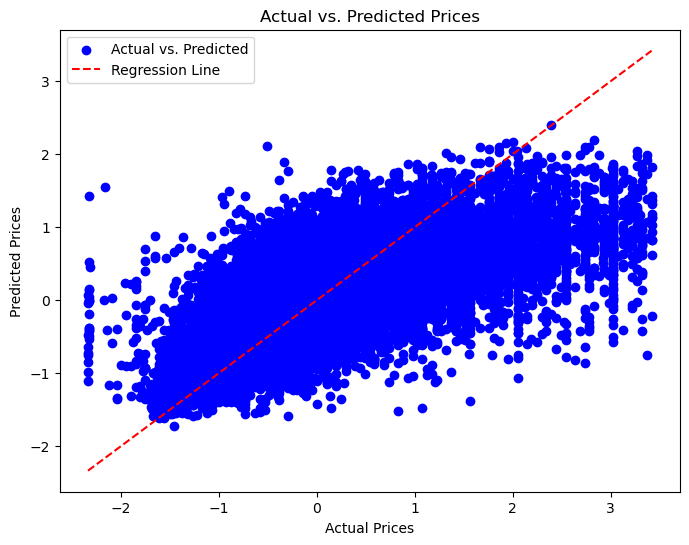

In [85]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Regression Line')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [86]:

model=LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.710915617099851


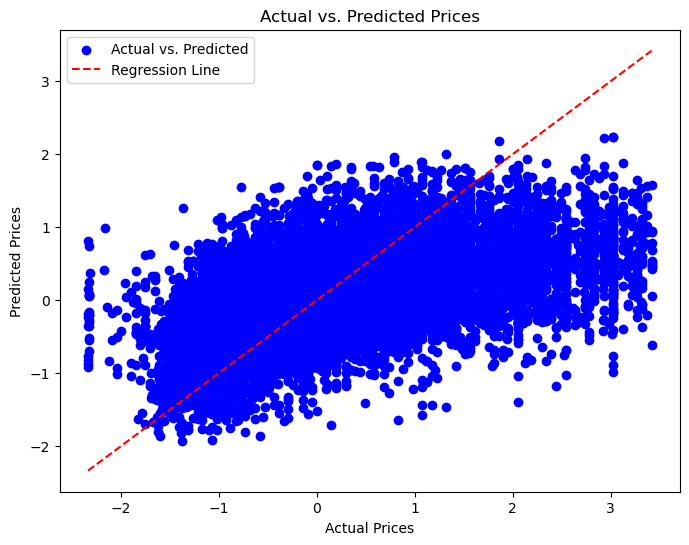

In [87]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Regression Line')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()